In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('anomaly.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156631 entries, 0 to 156630
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SK_Well                156631 non-null  object 
 1   Failure1_CulpritCause  156631 non-null  object 
 2   Failure2_CulpritCause  156631 non-null  object 
 3   Failure3_CulpritCause  156631 non-null  object 
 4   Failure4_CulpritCause  156631 non-null  object 
 5   Failure5_CulpritCause  156631 non-null  object 
 6   Failure6_CulpritCause  156631 non-null  object 
 7   Failure7_CulpritCause  156631 non-null  object 
 8   MeasureMRM12           156631 non-null  float64
 9   MeasureMRM142          156631 non-null  float64
 10  MeasureMRM143          156631 non-null  float64
 11  MeasureMRM187          156631 non-null  float64
 12  MeasureMRM188          156631 non-null  float64
 13  MeasureMRM219          156631 non-null  float64
 14  daysToFailure          156631 non-nu

In [3]:
X=df.drop(['daysToFailure'], axis=1)
Y=df['daysToFailure']

In [4]:
X.head()

,SK_Well,Failure1_CulpritCause,Failure2_CulpritCause,Failure3_CulpritCause,Failure4_CulpritCause,Failure5_CulpritCause,Failure6_CulpritCause,Failure7_CulpritCause,MeasureMRM12,MeasureMRM142,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM219,MeasureMRM204
0,0001d449,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,47.0,18.0,8.1,65.6,23.5,9999.0,8.9
1,0001d449,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,47.0,17.9,8.2,65.6,24.0,9999.0,8.9
2,0001d449,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,47.0,17.9,8.2,65.7,24.0,9999.0,8.9
3,0001d449,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,47.0,17.9,8.2,65.8,24.0,9999.0,8.9
4,0001d449,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,46.0,18.0,8.2,65.8,24.0,9999.0,8.9


In [5]:
Y.head()

0    30
1    29
2    28
3    27
4    26
Name: daysToFailure, dtype: int64

In [6]:
cuz=X[['Failure1_CulpritCause','Failure2_CulpritCause','Failure3_CulpritCause','Failure4_CulpritCause','Failure5_CulpritCause','Failure6_CulpritCause','Failure7_CulpritCause',]]
cuz.head()

,Failure1_CulpritCause,Failure2_CulpritCause,Failure3_CulpritCause,Failure4_CulpritCause,Failure5_CulpritCause,Failure6_CulpritCause,Failure7_CulpritCause
0,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно
1,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно
2,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно
3,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно
4,Механические примеси,Коррозионная агрессивность,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно


In [7]:
cuz.nunique()

Failure1_CulpritCause    41
Failure2_CulpritCause    44
Failure3_CulpritCause    47
Failure4_CulpritCause    38
Failure5_CulpritCause    31
Failure6_CulpritCause    22
Failure7_CulpritCause    15
dtype: int64

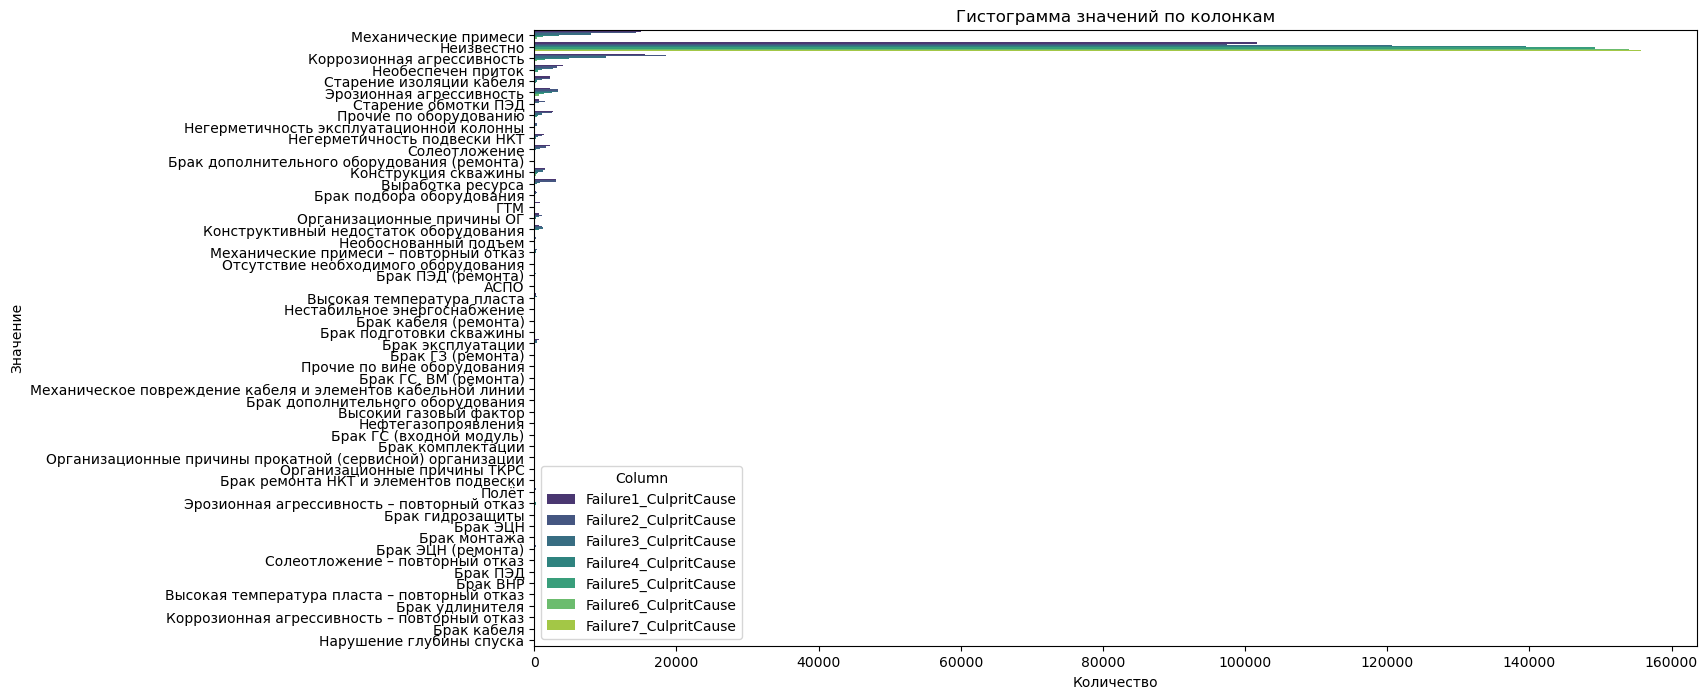

In [8]:
# Список колонок для построения гистограмм
columns_to_plot = [
    'Failure1_CulpritCause',
    'Failure2_CulpritCause',
    'Failure3_CulpritCause',
    'Failure4_CulpritCause',
    'Failure5_CulpritCause',
    'Failure6_CulpritCause',
    'Failure7_CulpritCause'
]

# Преобразуем данные в длинный формат
df_long = df.melt(value_vars=columns_to_plot, var_name='Column', value_name='Value')

# Настраиваем размер графика
plt.figure(figsize=(15, 8))

# Построение гистограммы
sns.countplot(data=df_long, y='Value', hue='Column', palette="viridis")

# Настройка заголовка и меток осей
plt.title('Гистограмма значений по колонкам')
plt.xlabel('Количество')
plt.ylabel('Значение')

# Отображаем график
plt.show()

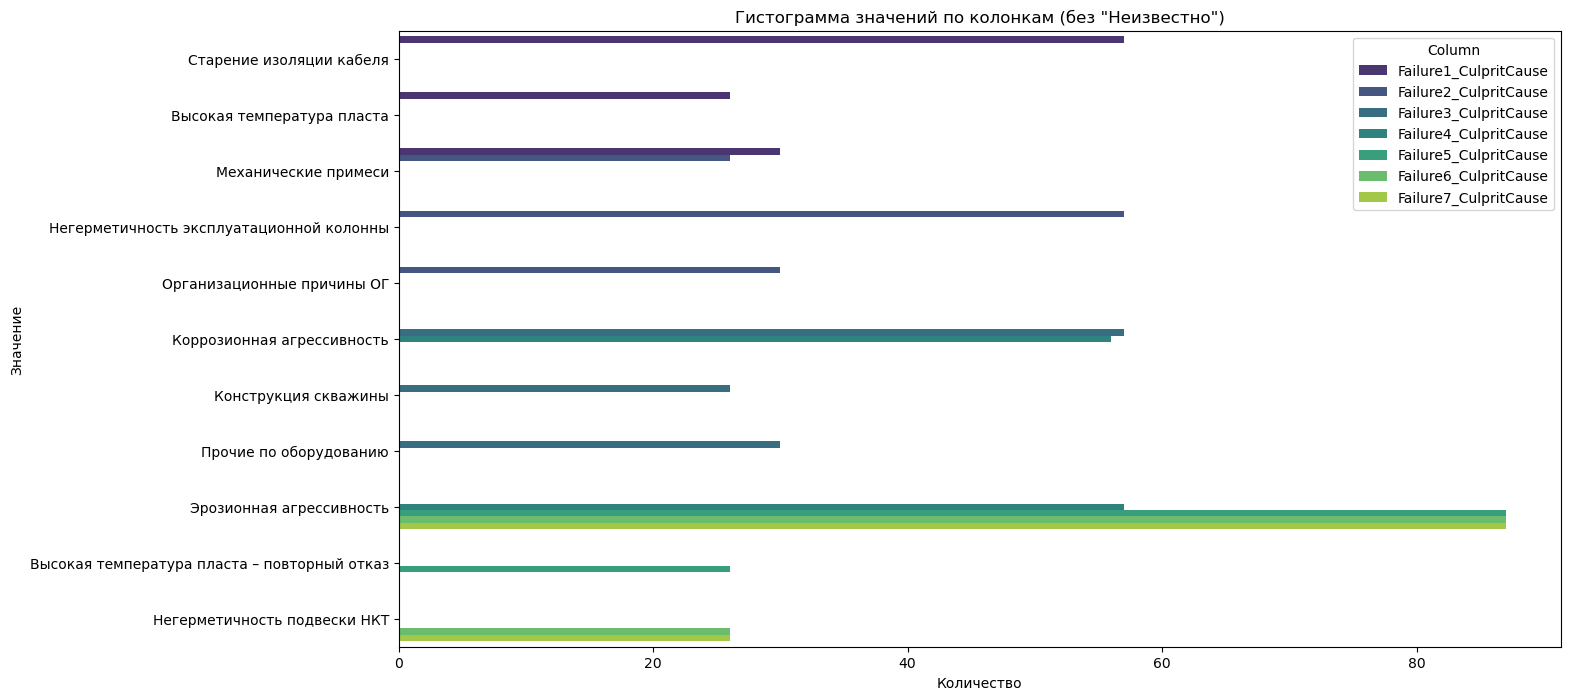

In [9]:
# Удаляем строки, содержащие 'Неизвестно' в указанных колонках
df_filtered = df[~df[columns_to_plot].isin(['Неизвестно']).any(axis=1)]

# Преобразуем данные в длинный формат
df_long = df_filtered.melt(value_vars=columns_to_plot, var_name='Column', value_name='Value')

# Настраиваем размер графика
plt.figure(figsize=(15, 8))

# Построение гистограммы
sns.countplot(data=df_long, y='Value', hue='Column', palette="viridis")

# Настройка заголовка и меток осей
plt.title('Гистограмма значений по колонкам (без "Неизвестно")')
plt.xlabel('Количество')
plt.ylabel('Значение')

# Отображаем график
plt.show()

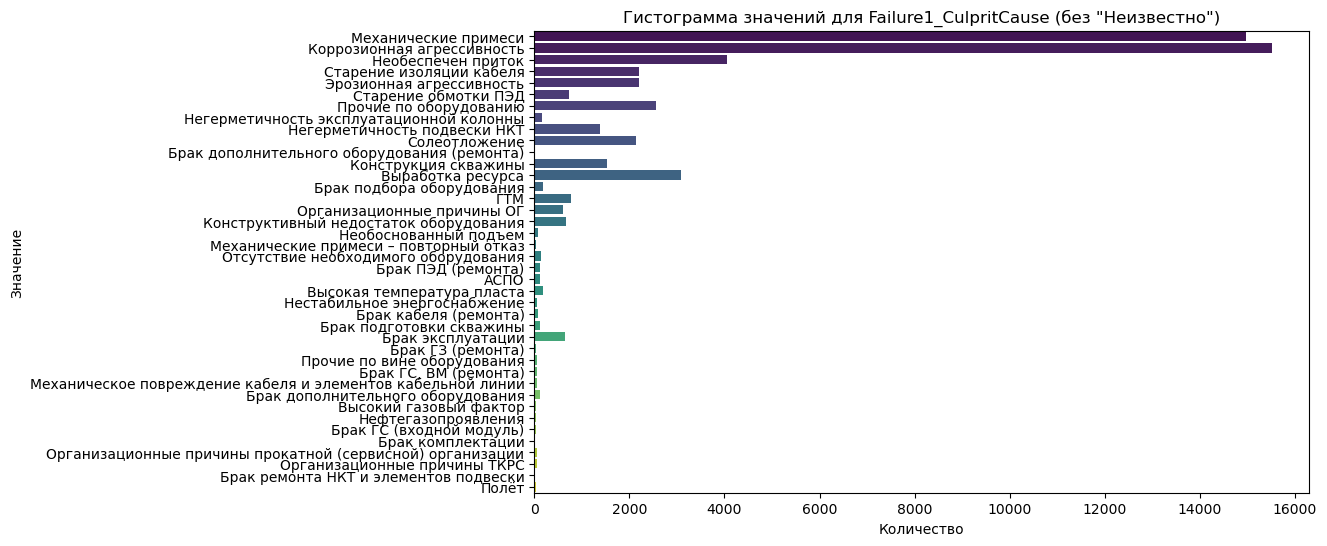

In [10]:
# Удаляем строки, содержащие 'Неизвестно' в колонке 'Failure1_CulpritCause'
df_filtered = df[df['Failure1_CulpritCause'] != 'Неизвестно']

# Настраиваем размер графика
plt.figure(figsize=(10, 6))

# Построение гистограммы для 'Failure1_CulpritCause'
sns.countplot(data=df_filtered, y='Failure1_CulpritCause', palette="viridis")

# Настройка заголовка и меток осей
plt.title('Гистограмма значений для Failure1_CulpritCause (без "Неизвестно")')
plt.xlabel('Количество')
plt.ylabel('Значение')

# Отображаем график
plt.show()

In [11]:
df_filtered.describe()

,MeasureMRM12,MeasureMRM142,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM219,daysToFailure,MeasureMRM204
count,54999.000000,54999.000000,54999.000000,54999.000000,54999.000000,54999.000000,54999.000000,54999.000000
mean,108.363022,14.397458,20.210791,65.378758,35.758097,9384.252932,15.780414,153.596940
std,148.944862,21.256721,12.827142,11.777926,22.672037,2078.147356,8.509533,303.683064
min,0.000000,0.200000,0.000000,50.000000,0.000000,1.000000,1.000000,0.000000
25%,25.000000,10.700000,11.000000,57.000000,21.900000,9999.000000,8.000000,0.000000
50%,50.000000,13.100000,18.400000,62.000000,30.000000,9999.000000,16.000000,0.000000
75%,124.000000,16.200000,25.100000,71.000000,42.300000,9999.000000,23.000000,141.100000
max,1997.000000,2617.200000,148.500000,267.600000,385.900000,10000.000000,30.000000,1345.000000


In [12]:
Y=df_filtered['daysToFailure']

In [13]:
X=df_filtered.drop(['daysToFailure','SK_Well','Failure1_CulpritCause','Failure2_CulpritCause','Failure3_CulpritCause','Failure4_CulpritCause','Failure5_CulpritCause','Failure6_CulpritCause','Failure7_CulpritCause',], axis=1)
X.head()

,MeasureMRM12,MeasureMRM142,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM219,MeasureMRM204
0,47.0,18.0,8.1,65.6,23.5,9999.0,8.9
1,47.0,17.9,8.2,65.6,24.0,9999.0,8.9
2,47.0,17.9,8.2,65.7,24.0,9999.0,8.9
3,47.0,17.9,8.2,65.8,24.0,9999.0,8.9
4,46.0,18.0,8.2,65.8,24.0,9999.0,8.9


In [14]:
def metrics(y_true,y_pred):
    acc=accuracy_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)
    roc_auc=roc_auc_score(y_true, y_pred)
    print(f'accuracy: {acc}\nf1: {f1}\nroc auc: {roc_auc} ')

In [17]:
y=df_filtered['Failure1_CulpritCause']
y

0               Механические примеси
1               Механические примеси
2               Механические примеси
3               Механические примеси
4               Механические примеси
                     ...            
156583    Коррозионная агрессивность
156584    Коррозионная агрессивность
156585    Коррозионная агрессивность
156586    Коррозионная агрессивность
156587    Коррозионная агрессивность
Name: Failure1_CulpritCause, Length: 54999, dtype: object

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y.nunique()

40

In [34]:
# Создаем и обучаем модель CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=350, depth=7, learning_rate=0.1, random_seed=42, verbose=False)
catboost_model.fit(X_train, y_train)


In [35]:
# Делаем предсказания на обучающей и тестовой выборках
catboost_pred_train = catboost_model.predict(X_train)
catboost_pred_test = catboost_model.predict(X_test)

In [36]:
# Оцениваем точность модели
train_accuracy = accuracy_score(y_train, catboost_pred_train)
test_accuracy = accuracy_score(y_test, catboost_pred_test)

print(f'Точность на обучающей выборке: {train_accuracy}')
print(f'Точность на тестовой выборке: {test_accuracy}')

# Выводим отчет по классификации
print('Отчет по классификации на тестовой выборке:')
print(classification_report(y_test, catboost_pred_test))

Точность на обучающей выборке: 0.9108616104911476
Точность на тестовой выборке: 0.8853636363636364
Отчет по классификации на тестовой выборке:
                                                             precision    recall  f1-score   support

                                                       АСПО       1.00      0.81      0.90        32
                                          Брак ГЗ (ремонта)       1.00      0.67      0.80         6
                                   Брак ГС (входной модуль)       1.00      1.00      1.00         5
                                      Брак ГС, ВМ (ремонта)       1.00      1.00      1.00        13
                                         Брак ПЭД (ремонта)       0.95      1.00      0.97        18
                          Брак дополнительного оборудования       1.00      0.95      0.97        20
                Брак дополнительного оборудования (ремонта)       1.00      0.67      0.80         3
                                      Брак кабел

In [39]:
# Делаем предсказания вероятностей на тестовой выборке
catboost_pred_proba_test = catboost_model.predict_proba(X_test)

# Преобразуем результаты в DataFrame для удобства
proba_df = pd.DataFrame(catboost_pred_proba_test, columns=catboost_model.classes_)
proba_df

,АСПО,Брак ГЗ (ремонта),Брак ГС (входной модуль),"Брак ГС, ВМ (ремонта)",Брак ПЭД (ремонта),Брак дополнительного оборудования,Брак дополнительного оборудования (ремонта),Брак кабеля (ремонта),Брак комплектации,Брак подбора оборудования,...,Организационные причины ТКРС,Организационные причины прокатной (сервисной) организации,Отсутствие необходимого оборудования,Полёт,Прочие по вине оборудования,Прочие по оборудованию,Солеотложение,Старение изоляции кабеля,Старение обмотки ПЭД,Эрозионная агрессивность
0,0.000024,0.000006,0.000005,0.000058,0.000009,0.000067,0.000014,0.000006,0.000008,0.000005,...,0.000014,0.000017,0.000016,0.000005,0.000007,0.000446,0.030224,0.003181,0.000580,0.001416
1,0.000004,0.000107,0.000009,0.000007,0.000031,0.000006,0.000006,0.000005,0.000005,0.000158,...,0.000041,0.000004,0.000480,0.000004,0.000003,0.002721,0.003575,0.033619,0.001970,0.103562
2,0.000129,0.000011,0.000009,0.000021,0.000767,0.000219,0.000115,0.000026,0.000061,0.000007,...,0.000094,0.000231,0.000007,0.000034,0.000042,0.056142,0.024155,0.003277,0.012253,0.135943
3,0.000005,0.000023,0.000008,0.000257,0.000023,0.000006,0.000014,0.000007,0.000008,0.004089,...,0.000033,0.000005,0.000238,0.000007,0.000005,0.020602,0.000161,0.044240,0.000372,0.074189
4,0.000002,0.000166,0.000003,0.000003,0.001695,0.000004,0.000003,0.000003,0.000003,0.000112,...,0.000003,0.000003,0.000088,0.000003,0.000003,0.001081,0.000145,0.005595,0.003253,0.005502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.000671,0.000004,0.000003,0.000065,0.000004,0.000334,0.000007,0.000019,0.000009,0.000030,...,0.000105,0.000454,0.000014,0.000006,0.000006,0.114088,0.011320,0.028837,0.017422,0.032068
10996,0.000226,0.000012,0.000012,0.000012,0.000012,0.000014,0.000032,0.000013,0.000104,0.000013,...,0.000016,0.000018,0.000014,0.000027,0.000041,0.020721,0.059169,0.072752,0.001793,0.003514
10997,0.000127,0.000005,0.000004,0.000003,0.000002,0.000005,0.000004,0.000003,0.000012,0.000003,...,0.000007,0.000004,0.000008,0.000006,0.000005,0.000445,0.000940,0.000985,0.000804,0.000371
10998,0.002139,0.000006,0.000004,0.000008,0.000003,0.000003,0.000015,0.000014,0.000122,0.000002,...,0.000024,0.000005,0.000005,0.000004,0.000005,0.003295,0.059851,0.001665,0.000832,0.045916


In [43]:
# Получаем вероятности предсказаний для первой строки из тестовой выборки
first_row_proba = catboost_pred_proba_test[0]

# Создаем список из пар (класс, вероятность)
class_proba_pairs = list(zip(catboost_model.classes_, first_row_proba))

# Сортируем список по вероятностям в порядке убывания
sorted_class_proba_pairs = sorted(class_proba_pairs, key=lambda x: x[1], reverse=True)

# Преобразуем вероятности в проценты и округляем до двух знаков после запятой
top_5_class_proba = [(cls, round(proba * 100, 2)) for cls, proba in sorted_class_proba_pairs[:5]]

# Выводим топ-5 вероятных значений с форматированием
print("Возможные осложнения: ")
for cls, proba in top_5_class_proba:
    print(f"'{cls}' с вероятностью {proba}%")

Возможные осложнения: 
'Механические примеси' с вероятностью 82.35%
'Необеспечен приток' с вероятностью 10.73%
'Солеотложение' с вероятностью 3.02%
'Коррозионная агрессивность' с вероятностью 2.45%
'Конструкция скважины' с вероятностью 0.54%


In [45]:
from collections import defaultdict

In [46]:
# Создаем словарь для суммирования вероятностей для каждого класса
class_proba_sum = defaultdict(float)

# Проходим по всем строкам тестовой выборки и суммируем вероятности для каждого класса
for row_proba in catboost_pred_proba_test:
    for cls, proba in zip(catboost_model.classes_, row_proba):
        class_proba_sum[cls] += proba

# Преобразуем словарь в список пар (класс, суммарная вероятность)
class_proba_sum_pairs = list(class_proba_sum.items())

# Сортируем список по суммарным вероятностям в порядке убывания
sorted_class_proba_sum_pairs = sorted(class_proba_sum_pairs, key=lambda x: x[1], reverse=True)

# Преобразуем суммарные вероятности в проценты и округляем до двух знаков после запятой
top_5_class_proba_sum = [(cls, round(proba * 100 / len(catboost_pred_proba_test), 2)) for cls, proba in sorted_class_proba_sum_pairs[:5]]

# Выводим топ-5 вероятных значений с форматированием
print("Топ-5 вероятных значений для всей тестовой выборки (в процентах):")
for cls, proba in top_5_class_proba_sum:
    print(f"'{cls}' с вероятностью {proba}%")

Топ-5 вероятных значений для всей тестовой выборки (в процентах):
'Коррозионная агрессивность' с вероятностью 28.21%
'Механические примеси' с вероятностью 27.79%
'Необеспечен приток' с вероятностью 7.43%
'Выработка ресурса' с вероятностью 5.42%
'Прочие по оборудованию' с вероятностью 4.6%


In [37]:
# Сохраняем модель в файл
catboost_model.save_model('catboost_model_сuz.cbm')

print("Модель успешно сохранена в файл 'catboost_model_cuz.cbm'")

Модель успешно сохранена в файл 'catboost_model_cuz.cbm'
